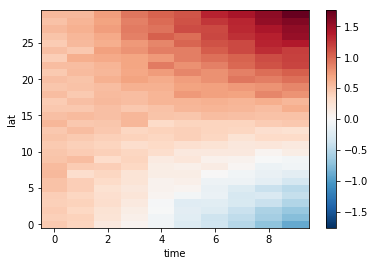

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

da = xr.DataArray(np.random.rand(10,30,40), dims=['time','lat','lon'])
da = da + 0.01 * da.time * (da.lat - 15)
da.mean(dim='lon').T.plot()

In [3]:
# define a function to compute a linear trend of a timeseries
def linear_trend(x):
    pf = np.polyfit(x.time, x, 1)
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(pf[0])

In [4]:
# apply the function over allpoints to calculate the trend at each point
stacked = da.stack(allpoints=['lat','lon'])  
trend = stacked.groupby('allpoints').apply(linear_trend)

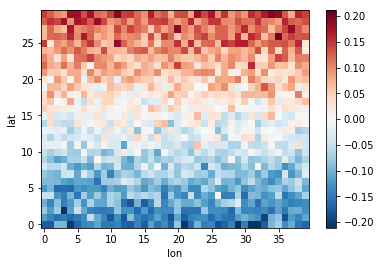

In [5]:
# unstack back to lat lon coordinates
trend_unstacked = trend.unstack('allpoints')
trend_unstacked.plot(cmap='RdBu_r')